# 🛡️ Customer Churn Prediction: Safeguarding Your Subscription Business 🚀


📁 Project Overview
This project aims to predict customer churn for a subscription-based service using historical customer data, including features like usage behavior and customer demographics. We will use various machine learning models to achieve this, including Logistic Regression, Random Forest, and Gradient Boosting.To better the performance Ensemble Model.

🛠️ Project Steps
* Data Loading and Cleaning
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Model Building and Evaluation


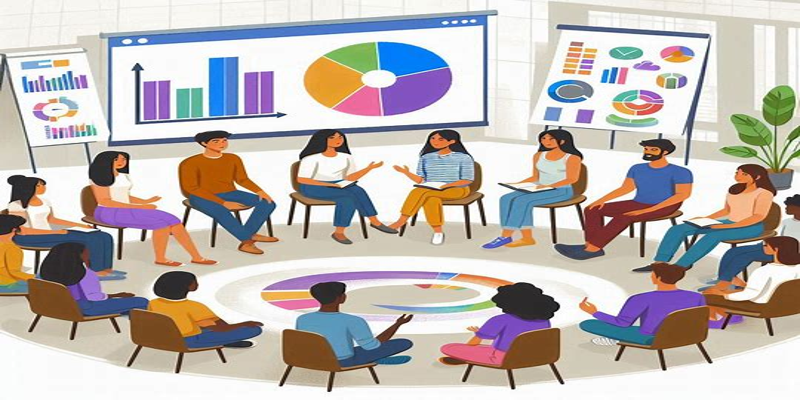

In [47]:
from PIL import Image
from IPython.display import display
display(Image.open('OIG3.jpeg').resize((800, 400)) or Image.open('OIG3.jpeg'))

In [2]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score, recall_score, precision_score


In [3]:
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like, you will need to pass a length-1 tuple")

 Data Loading and Inspection 📂


In [4]:
file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

📋 Data Description
The dataset contains information about customers of a bank, and it is used to predict customer churn. The dataset consists of the following columns:

* RowNumber: An index of the row in the dataset.
* CustomerId: A unique identifier for the customer.
* Surname: The surname of the customer.
* CreditScore: The credit score of the customer.
* Geography: The country of residence of the customer.
* Gender: The gender of the customer.
* Age: The age of the customer.
* Tenure: The number of years the customer has been with the bank.
* Balance: The account balance of the customer.
* NumOfProducts: The number of products the customer has with the bank.
* HasCrCard: Whether the customer has a credit card (1) or not (0).
* IsActiveMember: Whether the customer is an active member (1) or not (0).
* EstimatedSalary: The estimated salary of the customer.
* Exited: Whether the customer has exited (1) or not (0).


In [5]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


📊 Data Analysis
Target Variable: Exited

0: Customer did not churn.

1: Customer churned.

Categorical Variables: Geography, Gender, HasCrCard, IsActiveMember.

These variables will be one-hot encoded for the model training.

Numerical Variables: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.

These variables will be scaled for the model training.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


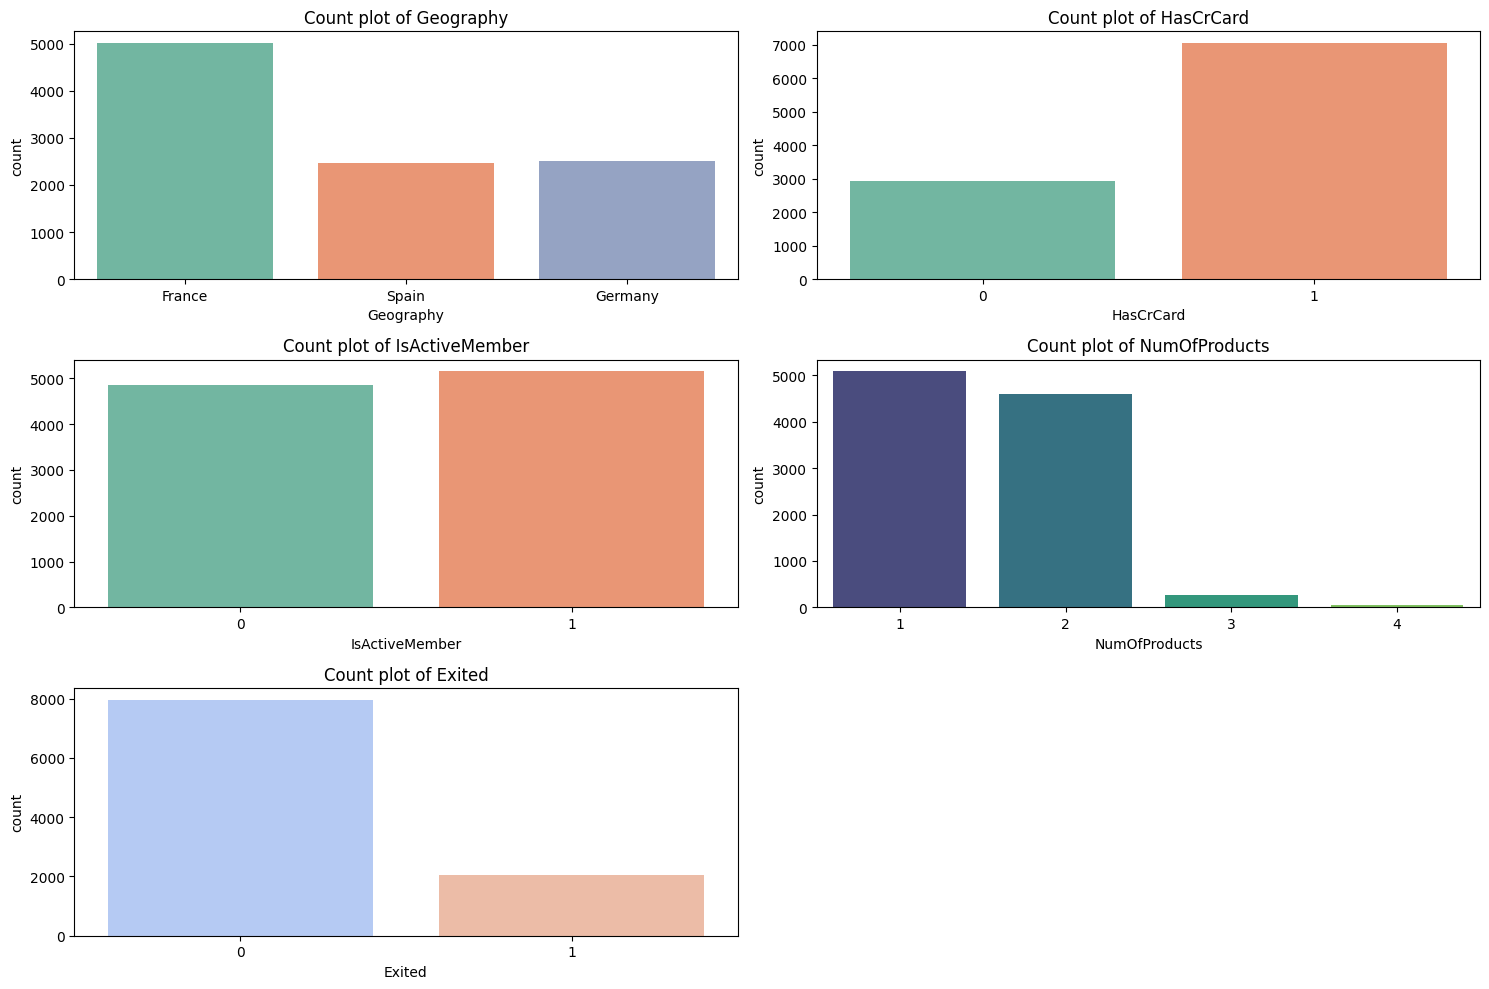

In [8]:
columns_to_plot = ['Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Exited']

plot_colors = {
    'Geography': sns.color_palette("Set2", 3),       
    'HasCrCard': sns.color_palette("Set2", 2),       
    'IsActiveMember': sns.color_palette("Set2", 2),   
    'NumOfProducts': sns.color_palette("viridis", 4), 
    'Exited': sns.color_palette("coolwarm", 2)        
}

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[column], palette=plot_colors.get(column, 'Set2'), hue=data[column], legend=False)
    plt.title(f'Count plot of {column}')

plt.tight_layout()
plt.show()



Data Cleaning 🧹

Remove Unnecessary Columns: RowNumber, CustomerId, and Surname

Convert Categorical Variables: Use one-hot encoding for Geography and Gender

Check for Missing Values


In [9]:
data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

In [11]:
data_cleaned.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [12]:
data_cleaned.nunique()

CreditScore           460
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Geography_Germany       2
Geography_Spain         2
Gender_Male             2
dtype: int64

In [13]:
duplicates = data_cleaned.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [14]:
data_cleaned.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [15]:
class_counts = data_cleaned['Exited'].value_counts()
print("Class distribution:\n", class_counts)


Class distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [16]:
class_percentages = class_counts / len(data_cleaned) * 100
print("\nClass distribution percentages:\n", class_percentages)



Class distribution percentages:
 Exited
0    79.63
1    20.37
Name: count, dtype: float64


Step 3: Exploratory Data Analysis (EDA) 🔍


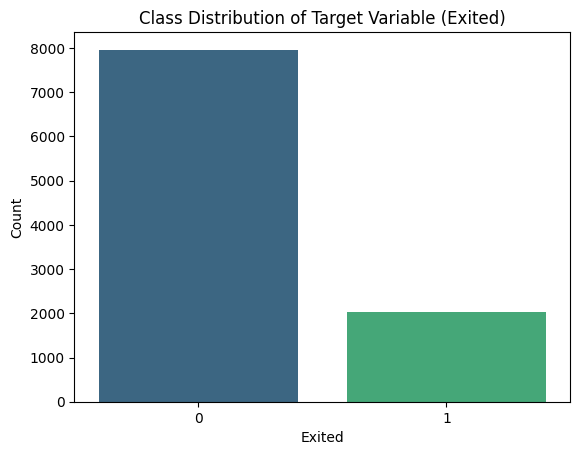

In [17]:
sns.countplot(x='Exited', hue='Exited', data=data_cleaned, palette='viridis', legend=False)
plt.title('Class Distribution of Target Variable (Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


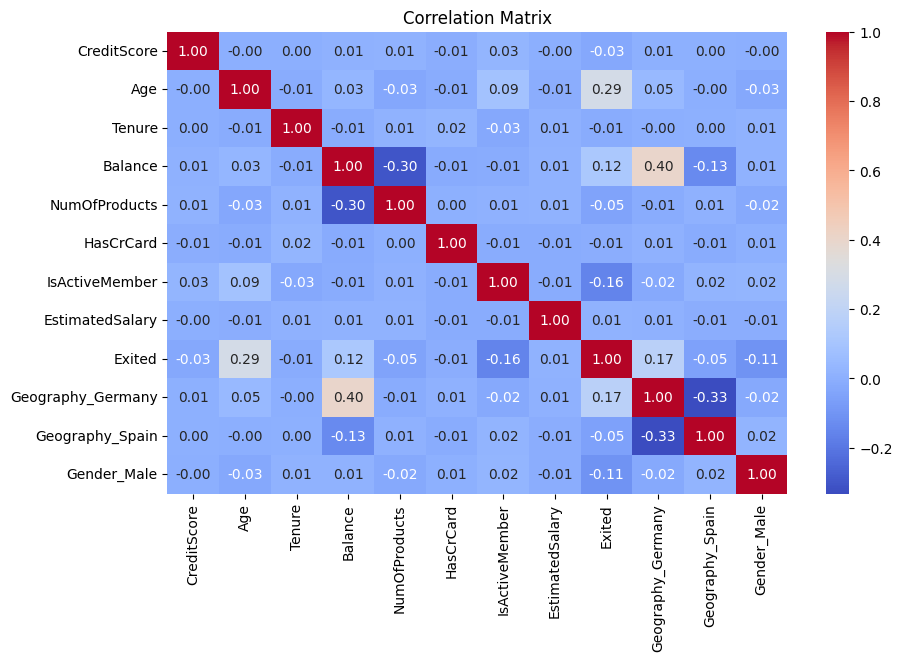

In [18]:
plt.figure(figsize=(10,6))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


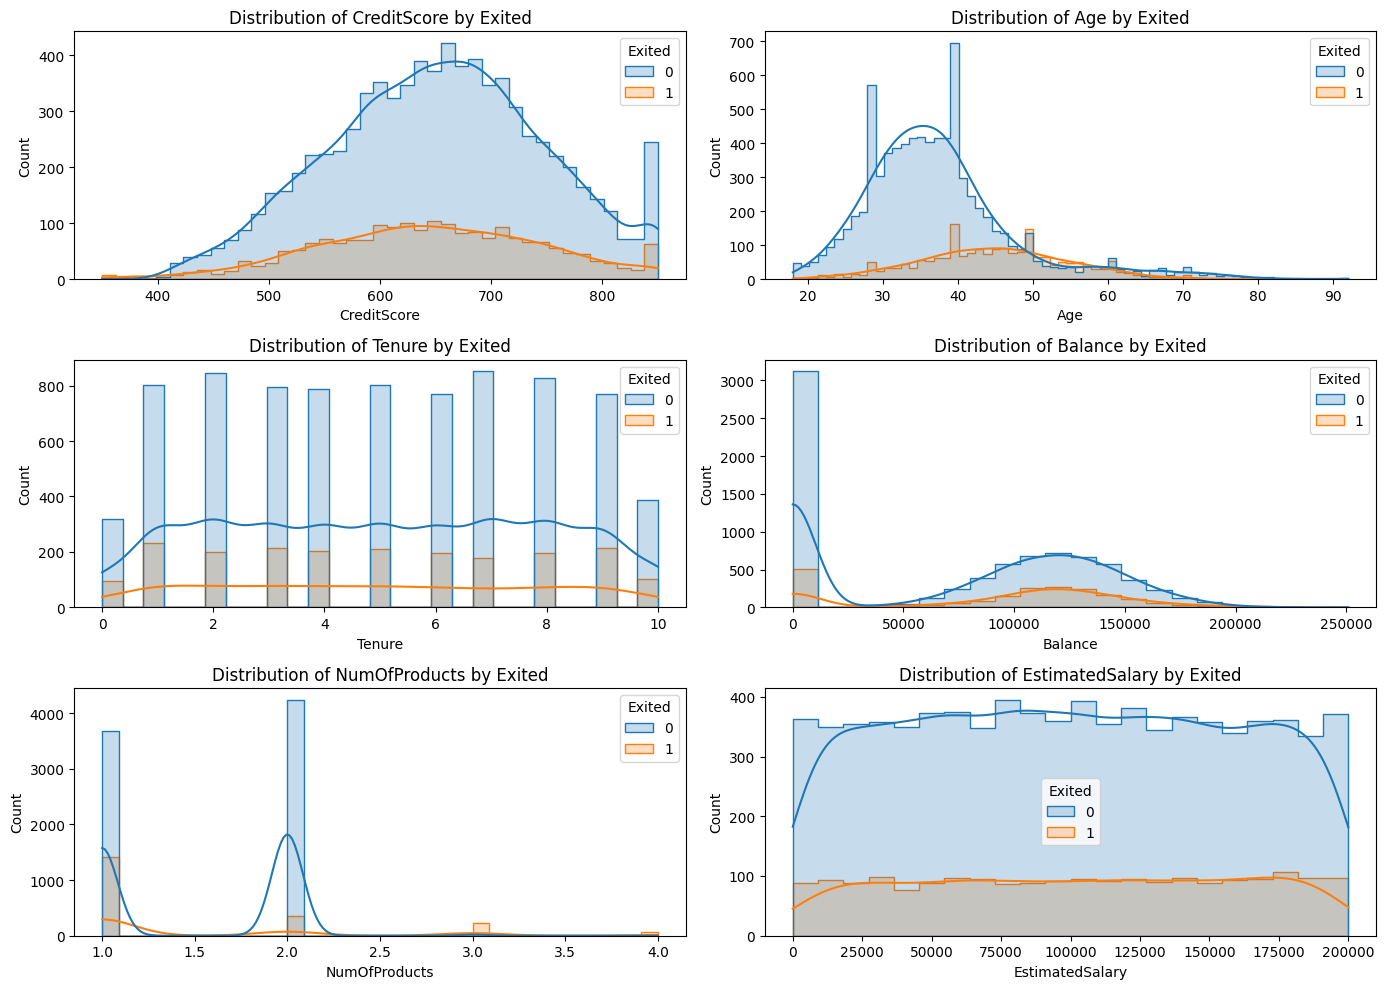

In [19]:
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data_cleaned, x=feature, hue='Exited', kde=True, element="step")
    plt.title(f'Distribution of {feature} by Exited')
plt.tight_layout()
plt.show()


🧩 Feature Engineering

Encode categorical variables and scale the features.



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = data_cleaned.drop('Exited', axis=1)
y = data_cleaned['Exited']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [24]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12712, 11), (12712,), (2000, 11), (2000,))

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

🏗️ Model Building and Evaluation

We will train and evaluate Logistic Regression, Random Forest, and Gradient Boosting models.



🔧 Model Training


In [27]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

📈 Model Evaluation

In [30]:
# Logistic Regression
from sklearn.metrics import confusion_matrix


logreg_pred = logreg_model.predict(X_test)
logreg_prob = logreg_model.predict_proba(X_test)[:, 1]
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_accuracy = logreg_model.score(X_test, y_test)
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))
print(f"Accuracy: {logreg_accuracy:.3f}")

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Performance:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(f"Accuracy: {rf_accuracy:.3f}")

# Gradient Boosting
gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_accuracy = gb_model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, gb_pred)
print("Gradient Boosting Performance:")
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
print(f"Accuracy: {gb_accuracy:.3f}")


Logistic Regression Performance:
[[1256  351]
 [ 169  224]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1607
           1       0.39      0.57      0.46       393

    accuracy                           0.74      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.78      0.74      0.76      2000

Accuracy: 0.740
Random Forest Performance:
[[1426  181]
 [ 140  253]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.64      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000

Accuracy: 0.840
Gradient Boosting Performance:
[[1368  239]
 [ 122  271]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1607
           1       0.53      0.69

🔢 Comparison of Model Performance


In [31]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [logreg_accuracy, rf_accuracy, gb_accuracy],
    'Precision': [logreg_precision, rf_precision, gb_precision],
    'Recall': [logreg_recall, rf_recall, gb_recall],
    'F1 Score': [logreg_f1, rf_f1, gb_f1]
})
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.7400,0.389565,0.569975,0.462810
1,Random Forest,0.8395,0.582949,0.643766,0.611850
2,Gradient Boosting,0.8195,0.531373,0.689567,0.600221


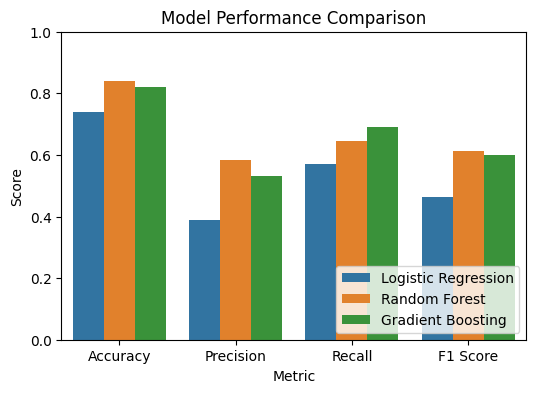

In [32]:
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(6,4))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()



📈 ROC Curve Comparison


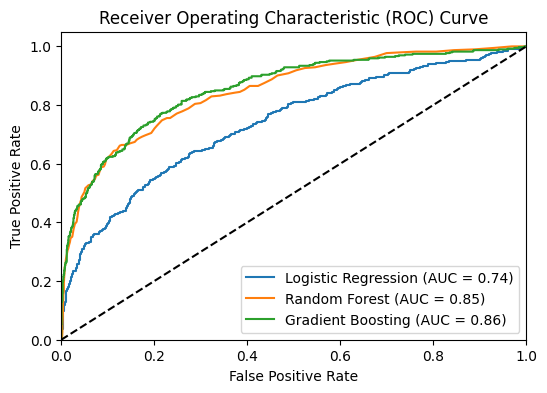

In [33]:
from sklearn.metrics import auc, roc_curve


def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(6,4))

    for model_name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

plot_roc_curve(models, X_test, y_test)



### Logistic Regression
- **Accuracy**: 0.7400
- **Precision**: 0.3896
- **Recall**: 0.5700
- **F1 Score**: 0.4628

_Logistic Regression_ has lower accuracy and precision but decent recall, making it less effective in detecting positive cases.

### Random Forest
- **Accuracy**: 0.8395
- **Precision**: 0.5830
- **Recall**: 0.6438
- **F1 Score**: 0.6119

_Random Forest_ shows the highest accuracy and performs well with decent precision and recall, making it effective for overall predictions.

### Gradient Boosting
- **Accuracy**: 0.8195
- **Precision**: 0.5314
- **Recall**: 0.6896
- **F1 Score**: 0.6002

_Gradient Boosting_ provides high recall and a good balance of precision and F1 Score, slightly less accurate than Random Forest but effective in identifying positive cases.


 Ensemble Model 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 score:  0.8583746461710403


In [38]:
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
gb_model = GradientBoostingClassifier(random_state=42)

# Combine models using Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')


voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [39]:
voting_pred = voting_clf.predict(X_test)
print("Ensemble Model Performance:")
print(confusion_matrix(y_test, voting_pred))
print(classification_report(y_test, voting_pred))
accuracy = accuracy_score(y_test, voting_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, voting_pred, average='weighted')
print(f"Precision: {precision:.2f}")


Ensemble Model Performance:
[[1381  226]
 [ 139  254]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.53      0.65      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.82      0.82      2000

Accuracy: 0.82
Precision: 0.83


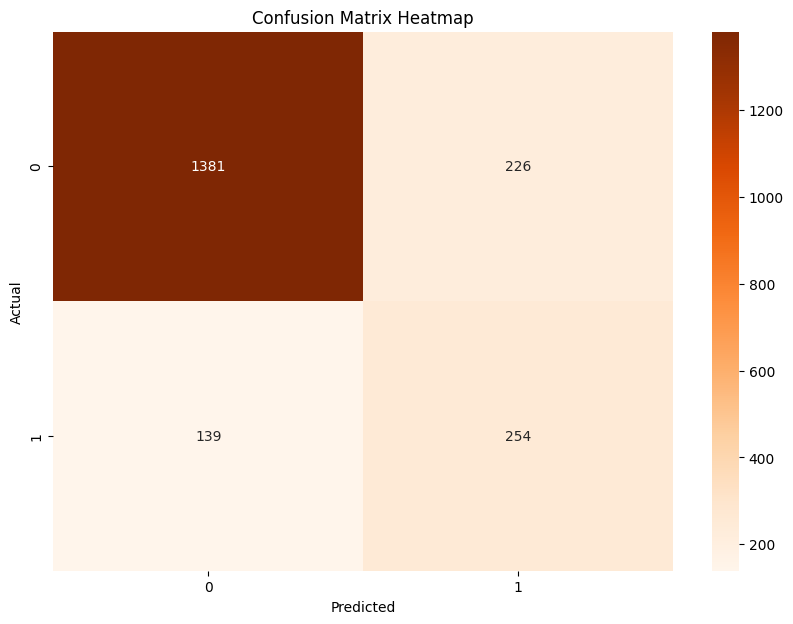

In [43]:
conf_matrix = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


**Metrics:**

- **Accuracy**: 0.82 (82% of all predictions are correct)
  - The model correctly predicts customer churn status 82% of the time.

- **Precision**:
  - **Class 0 (Non-churning)**: 0.91 (91% of predicted non-churning customers are truly non-churning)
  - **Class 1 (Churning)**: 0.53 (53% of predicted churning customers are truly churning)
    - Precision measures the accuracy of the positive predictions.

- **Recall**:
  - **Class 0**: 0.86 (86% of actual non-churning customers are correctly identified)
  - **Class 1**: 0.65 (65% of actual churning customers are correctly identified)
    - Recall measures how well the model identifies all actual positive cases.

- **F1 Score**:
  - **Class 0**: 0.88 (Balance between precision and recall for non-churning customers)
  - **Class 1**: 0.58 (Balance between precision and recall for churning customers)
    - The F1 Score is the harmonic mean of precision and recall, providing a balanced measure.

- **Macro Average**:
  - **Precision**: 0.72
  - **Recall**: 0.75
  - **F1 Score**: 0.73
    - Averages metrics across classes, treating each class equally.

- **Weighted Average**:
  - **Precision**: 0.83
  - **Recall**: 0.82
  - **F1 Score**: 0.82
    - Averages metrics across classes, weighted by the number of instances in each class.

**Summary:**
The ensemble model performs well with an accuracy of 82%. It excels at predicting non-churning customers (high precision and recall for class 0) but is less effective at identifying churning customers (lower precision and recall for class 1). The balanced precision and recall metrics highlight its strengths in handling non-churning cases and provide a comprehensive view of performance across different customer groups.

In [45]:
import joblib
joblib_file = "voting_classifier_model_Customer_churnPrediction.pkl"
joblib.dump(voting_clf, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to voting_classifier_model_Customer_churnPrediction.pkl
